In [49]:
import pip

def install(package):
  pip.main(['install', package])

try:
  import warnings
  warnings.filterwarnings('ignore')
  import pandas as pd
  import numpy as np
  import uuid
  import random
  import datetime

  from plotnine import *
  import statsmodels.api as sm
  import sys
  from sklearn.linear_model import LogisticRegression 
  from sklearn.preprocessing import StandardScaler 
  from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
  from sklearn.model_selection import train_test_split
  from sklearn.model_selection import KFold
  from sklearn.model_selection import LeaveOneOut
  from sklearn.linear_model import LinearRegression
  import tensorflow.keras as kb
  from tensorflow.keras import backend
  

  from sklearn.model_selection import train_test_split
  from sklearn.model_selection import GridSearchCV

  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.tree import DecisionTreeClassifier

  from sklearn.pipeline import make_pipeline
  from sklearn.mixture import GaussianMixture
  from sklearn.compose import make_column_transformer

  from sklearn.metrics import accuracy_score, plot_confusion_matrix
  from sklearn.metrics import silhouette_score

  import matplotlib.pyplot as plt
  import seaborn as sns
  import csv
  %matplotlib inline
except ImportError:
  print('Modules not installed')
  install('pandas')
  install('sklearn')
  install('matplotlib')
  install('plotnine')
  install('statsmodels')
  install('seaborn')
  install('tensorflow')

In [50]:
url = 'https://raw.githubusercontent.com/min-is/Chapman-University/main/Personal%20Projects/Ballsdeep%20Range%20Dataset%20-%20Sheet1%20(1).csv'
df = pd.read_csv(url)

df

,Club,Distance,Confidence,Ball Flight
0,driver,253,7,fade
1,driver,256,9,straight
2,driver,245,9,straight
3,driver,234,6,draw
4,driver,185,4,shank
5,threewood,200,9,straight
6,threewood,187,8,straight
7,threewood,189,8,straight
8,threewood,195,10,straight
9,threewood,185,8,fade


In [51]:
# Counting the missing data per column


null = df.isnull().sum()
null_preDF = {'Number of Missing Datapoints': null}
nullDF = pd.DataFrame(null_preDF)

nullDF

,Number of Missing Datapoints
Club,0
Distance,0
Confidence,0
Ball Flight,0


In [52]:
# using get_dummies() to convert gender into dummy variables
dummies = pd.get_dummies(df['Ball Flight'])

# concating new columns to dataframe
df = pd.concat([df,dummies], axis = 1)

# removing original column from dataframe
df.drop('Ball Flight', inplace = True, axis = 1)
df.head()



,Club,Distance,Confidence,draw,fade,shank,straight
0,driver,253,7,0,1,0,0
1,driver,256,9,0,0,0,1
2,driver,245,9,0,0,0,1
3,driver,234,6,1,0,0,0
4,driver,185,4,0,0,1,0


### Algorithm: K-Nearest Neighbors

Accuracy for our training dataset with tuning is :  0.5208333333333334
Accuracy for our test dataset with tuning is :  0.16666666666666666
The best k value was found to be:  4


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

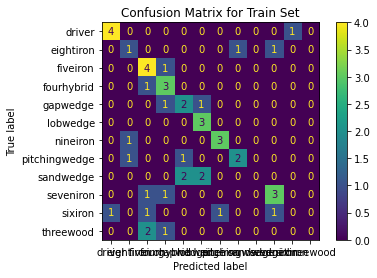

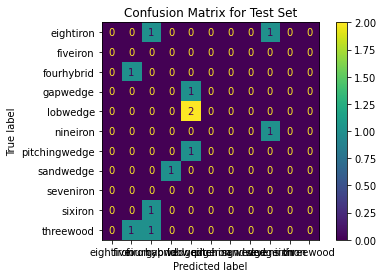

In [26]:
predictors = ['Distance', 'Confidence', 'draw', 'fade', 'shank']

contin = ['Distance', 'Confidence']

X = df[predictors]
y = df['Club']

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# create model
knn = KNeighborsClassifier()

# create z score object
z = make_column_transformer((StandardScaler(), contin))

# make pipeline
pipe = make_pipeline(z, knn)

# find the k 'key'
pipe.get_params().keys()

# choose potential values of k
ks = {"kneighborsclassifier__n_neighbors": range(1,30)}

# use grid search to find best parameters
grid = GridSearchCV(pipe, ks, scoring = "accuracy", cv = 5, refit = True)

# fit model
knnmod = grid.fit(X_train, y_train)

# finding the accuracy of the training/test datasets
print('Accuracy for our training dataset with tuning is : ', knnmod.score(X_train, y_train))
print('Accuracy for our test dataset with tuning is : ', knnmod.score(X_test, y_test))

# getting the k value used for the KNN model
print('The best k value was found to be: ', knnmod.best_estimator_.get_params()['kneighborsclassifier__n_neighbors'])

# plotting the confusion matrices
plot_confusion_matrix(knnmod, X_train, y_train)
plt.title('Confusion Matrix for Train Set')

plot_confusion_matrix(knnmod, X_test, y_test)
plt.title('Confusion Matrix for Test Set')

### Algorithm: Decision Tree (Native)

Accuracy for our training dataset with tuning is :  0.8958333333333334
Accuracy for our test dataset with tuning is :  0.3333333333333333
The best max_depth value was found to be:  7


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

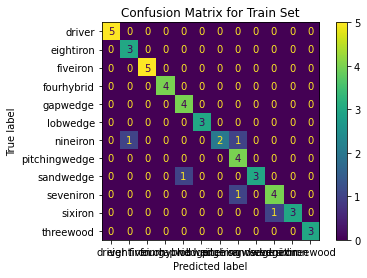

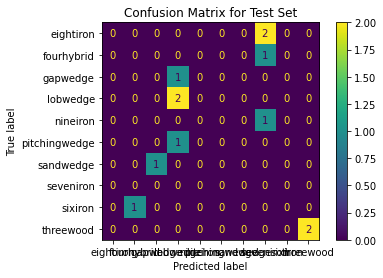

In [27]:
# Decision Tree Model

X = df[predictors]
y = df['Club']

# a new TTS is not made in this model because we want to use the same training set

# z-scoring
z = make_column_transformer((StandardScaler(), contin))

# creating decision tree model
tree = DecisionTreeClassifier()

# making pipeline
pipe = make_pipeline(z, tree)

# find the max_depth 'key'
pipe.get_params().keys()

# choose potential values of max_depth
depths = {"decisiontreeclassifier__max_depth": range(1,9)}

# use grid search to find best value
grid = GridSearchCV(pipe, depths, scoring = "accuracy", cv = 5, refit = True)

# fit model
dtmod = grid.fit(X_train, y_train)

# finding the accuracy of the training dataset
print('Accuracy for our training dataset with tuning is : ', dtmod.score(X_train, y_train))
print('Accuracy for our test dataset with tuning is : ', dtmod.score(X_test, y_test))

print('The best max_depth value was found to be: ', dtmod.best_estimator_.get_params()['decisiontreeclassifier__max_depth'])

plot_confusion_matrix(dtmod, X_train, y_train)
plt.title('Confusion Matrix for Train Set')

plot_confusion_matrix(dtmod, X_test, y_test)
plt.title('Confusion Matrix for Test Set')

### Algoritm: Logistic Regression

The accuracy score of the train set is:  0.5625
The accuracy score of the test set is:  0.25


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

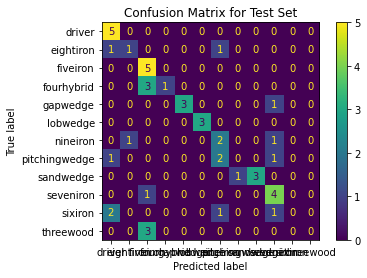

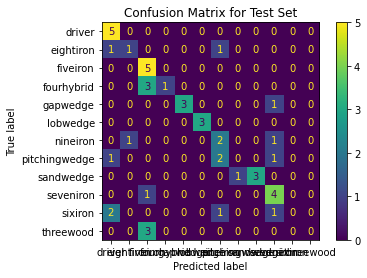

In [28]:
# Logistic Regression Model

# a new TTS is not made in this model because we want to use the same training set

# creating Logistic Regression model
lr = LogisticRegression()

# z scoring continuous/interval variables
zscore = StandardScaler()
zscore.fit(X_train[contin])
Xz_train = zscore.transform(X_train[contin])
Xz_test = zscore.transform(X_test[contin])

# fit model
lrmod = lr.fit(X_train, y_train)
    
a = accuracy_score(y_test, lrmod.predict(X_test))
b = accuracy_score(y_train, lrmod.predict(X_train))
print('The accuracy score of the train set is: ', b)
print('The accuracy score of the test set is: ', a)

plot_confusion_matrix(lrmod, X_train, y_train)
plt.title('Confusion Matrix for Test Set')

plot_confusion_matrix(lrmod, X_train, y_train)
plt.title('Confusion Matrix for Test Set')

### Algorithm: Neural Networks

In [66]:
url = 'https://raw.githubusercontent.com/min-is/Chapman-University/main/Personal%20Projects/Ballsdeep%20Range%20NN%20Dataset%20-%20Sheet1.csv'

df = pd.read_csv(url)



In [54]:
# using get_dummies() to convert gender into dummy variables
dummies = pd.get_dummies(df['Ball Flight'])

# concating new columns to dataframe
df = pd.concat([df,dummies], axis = 1)

# removing original column from dataframe
df.drop('Ball Flight', inplace = True, axis = 1)
df.head()


,Club,Distance,Confidence,draw,fade,shank,straight
0,1,253,7,0,1,0,0
1,1,256,9,0,0,0,1
2,1,245,9,0,0,0,1
3,1,234,6,1,0,0,0
4,1,185,4,0,0,1,0


In [55]:
df.dtypes

Club          int64
Distance      int64
Confidence    int64
draw          uint8
fade          uint8
shank         uint8
straight      uint8
dtype: object

In [62]:
predictors = ['Distance', 'Confidence', 'draw', 'fade', 'shank']

X = df[predictors]
y = df['Club']

# Regression

#structure of the model
model = kb.Sequential([
    kb.layers.Dense(5, input_shape =[5]), #input
    kb.layers.Dense(3),
    kb.layers.Dense(1) #output
])

#how to train the model
model.compile(loss = "mean_squared_error",
              optimizer = 'adam')

#fit the model (same as SKlearn)
model.fit(X,y, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 192.4158
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 140.7452
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 100.3772
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 71.0872
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 51.7325
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 42.1081
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 39.9564
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 42.0265
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 45.4178
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 47.9507
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 49.3862
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 48.8288
Epoch 13/100
2/2 [============================

In [63]:
Xn = X.to_numpy()
Xn.shape

y_pred = model.predict(Xn).flatten()

true_pred = pd.DataFrame({"true": y, "pred": y_pred})

2/2 [==============================] - 0s 1ms/step


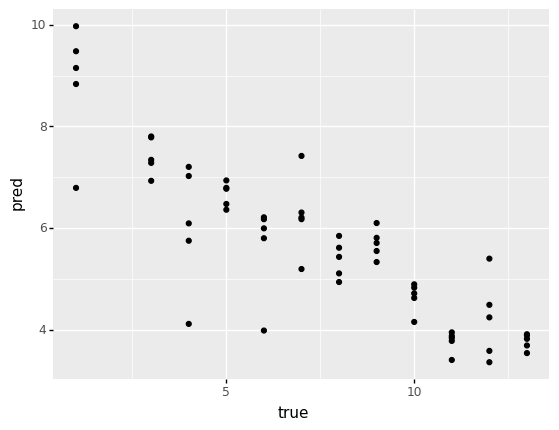

<ggplot: (146714748049)>

In [65]:
(ggplot(true_pred, aes(x = "true", y = "pred")) + geom_point())

In [64]:
mean_absolute_error(y_pred, y)

4.411596190929413